In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [94]:
"""Loads the dataset"""
data = pd.read_csv("retail_sales_dataset.csv")
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24/11/2023,CUST001,Male,34,Beauty,3,50,150
1,2,27/02/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13/01/2023,CUST003,Male,50,Electronics,1,30,30
3,4,21/05/2023,CUST004,Male,37,Clothing,1,500,500
4,5,06/05/2023,CUST005,Male,30,Beauty,2,50,100


In [38]:
"""Checks for missing values"""
missing_values = data.isnull().sum()
missing_values

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [95]:
"""Checks for duplicates"""
duplicates = data.duplicated
data[duplicates]

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount


In [96]:
"""Descriptive analysis"""
desc_stats =round(data.describe(), 2)
desc_stats

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.00,1000.00,1000.00,1000.00,1000.0
mean,500.50,41.39,2.51,179.89,456.0
std,288.82,13.68,1.13,189.68,560.0
min,1.00,18.00,1.00,25.00,25.0
25%,250.75,29.00,1.00,30.00,60.0
50%,500.50,42.00,3.00,50.00,135.0
75%,750.25,53.00,4.00,300.00,900.0
max,1000.00,64.00,4.00,500.00,2000.0


In [42]:
"""Converts datatype of Date"""
data['Date'] = pd.to_datetime(data['Date'])
print(data['Date'].head())

C:\Users\zephr\AppData\Local\Temp\ipykernel_7952\4143574317.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


0   2023-11-24
1   2023-02-27
2   2023-01-13
3   2023-05-21
4   2023-05-06
Name: Date, dtype: datetime64[ns]


In [43]:
"""Sets Date as index"""
data.set_index('Date', inplace = True)
data = data.sort_index()
print(data.head())

            Transaction ID Customer ID  Gender  Age Product Category  \
Date                                                                   
2023-01-01             522     CUST522    Male   46           Beauty   
2023-01-01             180     CUST180    Male   41         Clothing   
2023-01-01             559     CUST559  Female   40         Clothing   
2023-01-02             303     CUST303    Male   19      Electronics   
2023-01-02             979     CUST979  Female   19           Beauty   

            Quantity  Price per Unit  Total Amount  
Date                                                
2023-01-01         3             500          1500  
2023-01-01         3             300           900  
2023-01-01         4             300          1200  
2023-01-02         3              30            90  
2023-01-02         1              25            25  


In [44]:
daily_sales = data.resample('D')['Total Amount'].sum()
print(daily_sales.head())

Date
2023-01-01    3600
2023-01-02    1765
2023-01-03     600
2023-01-04    1240
2023-01-05    1100
Freq: D, Name: Total Amount, dtype: int64


In [45]:
print(data.columns)

Index(['Transaction ID', 'Customer ID', 'Gender', 'Age', 'Product Category',
       'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [46]:
monthly_sales = data.resample('ME')['Total Amount'].sum()
print(monthly_sales.head())

Date
2023-01-31    35450
2023-02-28    44060
2023-03-31    28990
2023-04-30    33870
2023-05-31    53150
Freq: ME, Name: Total Amount, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

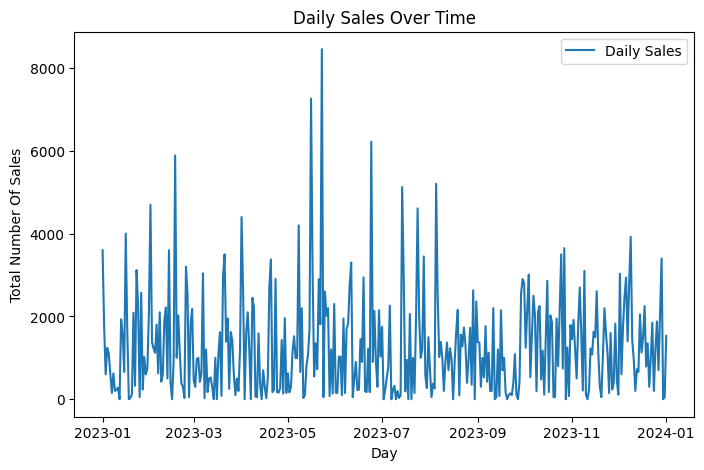

In [47]:
plt.figure(figsize = (8,5))
plt.plot(daily_sales, label = 'Daily Sales')
plt.title('Daily Sales Over Time')
plt.xlabel('Day')
plt.ylabel('Total Number Of Sales')
plt.legend()
plt.show

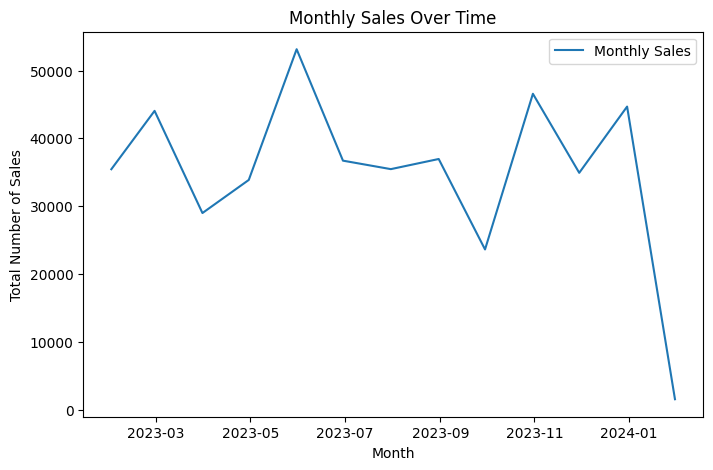

In [48]:
plt.figure(figsize = (8, 5))
plt.plot(monthly_sales, label = 'Monthly Sales')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Number of Sales')
plt.legend()
plt.show()

In [59]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 2.0 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.8 MB 1.2 MB/s eta 0:00:08
   --- ------------------------------------ 0.8/9.8 MB 1.2 MB/s eta 0:00:08
   ---- ----------------------------------- 1.0/9.8 MB 1.0 MB/s eta 0:00:09
   ---- ----------------------------------- 1.0/9.8 MB 1.0 MB/s eta 0:00:09
   ----- ---------------------------------- 1.3/9.8 MB 878.3 kB/s eta 0:00:10
   ----- ---------------------------------- 1.3/9.8 MB 878.3 kB/s eta 0:00:10
   ------ --------------------------------- 1.6/9.8 MB 826.2 kB/s eta 0:00:10
   ------- -------------------------------- 1.8/9.8 MB 847.2 kB/s eta 0:00:10
   ------- -------------------------------- 1.8/9.8 MB 847.2 kB/s eta 0:00:10
   ------- -------------------------------- 1.8/9.8 MB 847.2 kB/s eta 0:00:10
   --------- -

In [60]:
import statsmodels.api as sm

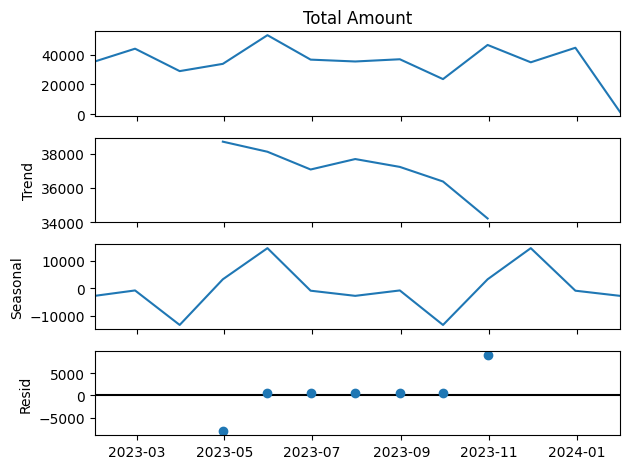

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(monthly_sales, model = 'addictive', period = 6)
decomposition.plot()
plt.show()

In [67]:
"""Check the stationarity"""
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(monthly_sales.dropna())
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

if adf_result[1] < 0.05:
    print("The time series is stationary")
else:
    print("The time series is not stationary")

ADF Statistic: -3.67020881006559
p-value: 0.0045522517976560595
The time series is stationary


In [70]:
"""Using ARIMA to predict future sales"""
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(monthly_sales, order= (1,1,1))
arima_result = model.fit()

print(arima_result.summary())

forecast = arima_result.get_forecast(steps = 12)
forecast_index = pd.date_range(monthly_sales.index[-1], periods = 12, freq = 'ME')
forecast_series = forecast.predicted_mean
forecast_series.index = forecast_index


                               SARIMAX Results                                
Dep. Variable:           Total Amount   No. Observations:                   13
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -132.800
Date:                Tue, 21 Jan 2025   AIC                            271.599
Time:                        09:53:24   BIC                            273.054
Sample:                    01-31-2023   HQIC                           271.061
                         - 01-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0663      0.563     -0.118      0.906      -1.170       1.038
ma.L1         -0.9666      0.404     -2.391      0.017      -1.759      -0.174
sigma2      2.209e+08   1.77e-09   1.25e+17      0.0

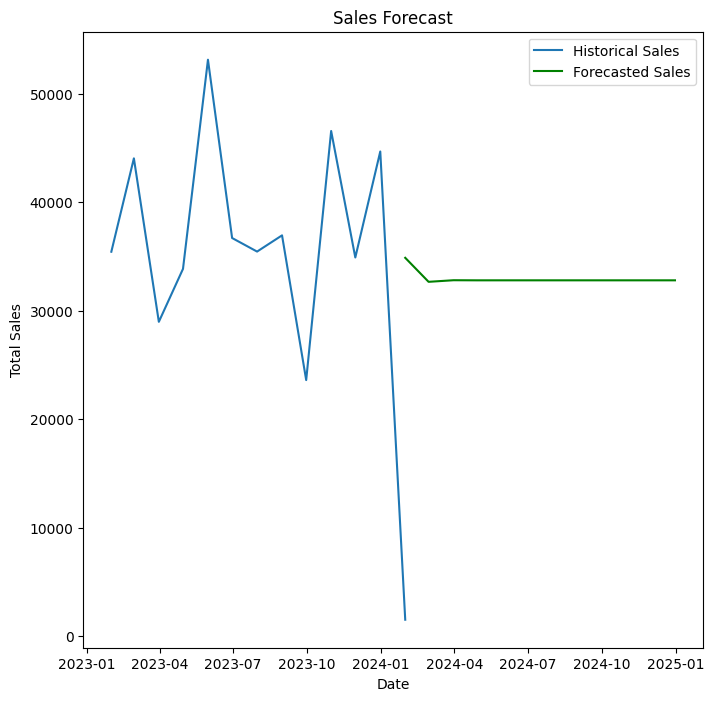

In [71]:
plt.figure(figsize = (8,8))
plt.plot(monthly_sales, label = 'Historical Sales')
plt.plot(forecast_series, label = 'Forecasted Sales', color = 'green')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [72]:
"""Evaluates the ARIMA model"""
from sklearn.metrics import mean_absolute_error, mean_squared_error
predicted = arima_result.fittedvalues
mae = mean_absolute_error(monthly_sales.dropna(), predicted)
mse = mean_squared_error(monthly_sales.dropna(), predicted)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 13539.944345898779
Mean Squared Error: 321985365.2420865


In [73]:
gender_analysis = data['Gender'].value_counts()
gender_analysis

Gender
Female    510
Male      490
Name: count, dtype: int64

In [79]:
spending_by_gender = data.groupby('Gender')['Total Amount'].sum()
spending_by_gender

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

In [81]:
total_prod_sold = data.groupby('Product Category')['Total Amount'].sum()
total_prod_sold

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

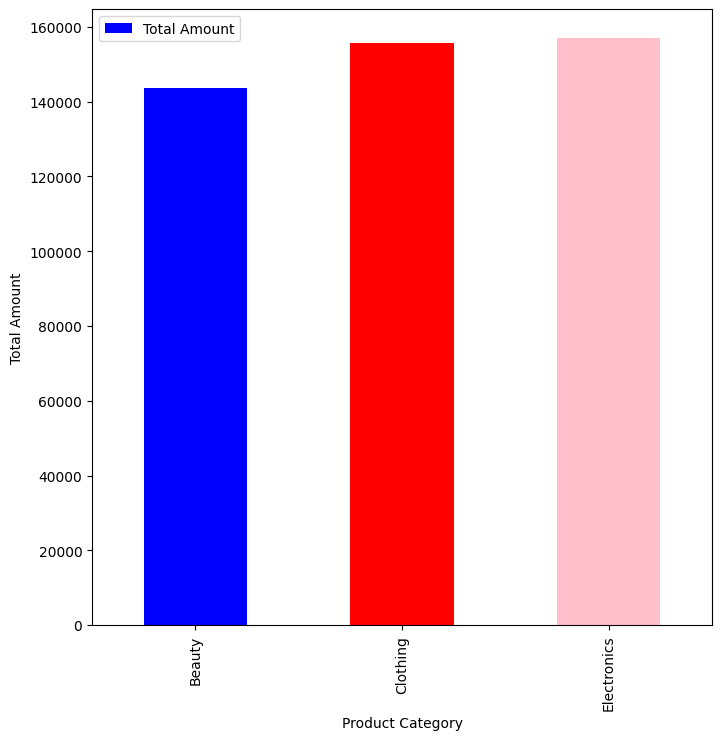

In [87]:
plt.figure(figsize = (8,8))
total_prod_sold.plot(kind = 'bar', color = ['blue', 'red', 'pink'])
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.legend()
plt.show()

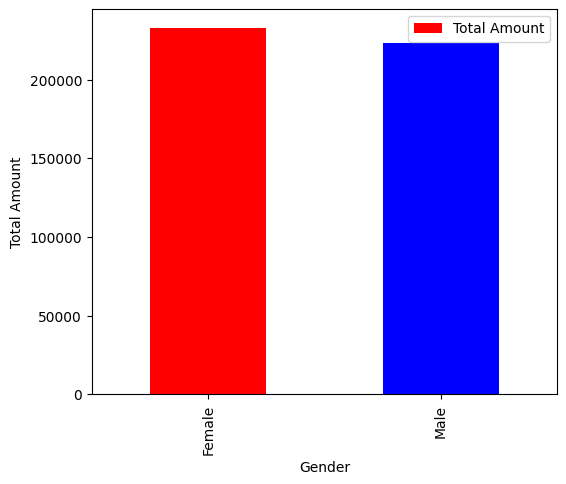

In [92]:
plt.figure(figsize = (6, 5))
spending_by_gender.plot(kind = 'bar', color = ['red', 'blue'])
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.legend()
plt.show()